<a href="https://colab.research.google.com/github/Avaniharetlia/MLPROJECTS/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

Negative(0):  165
Positive(1):  138


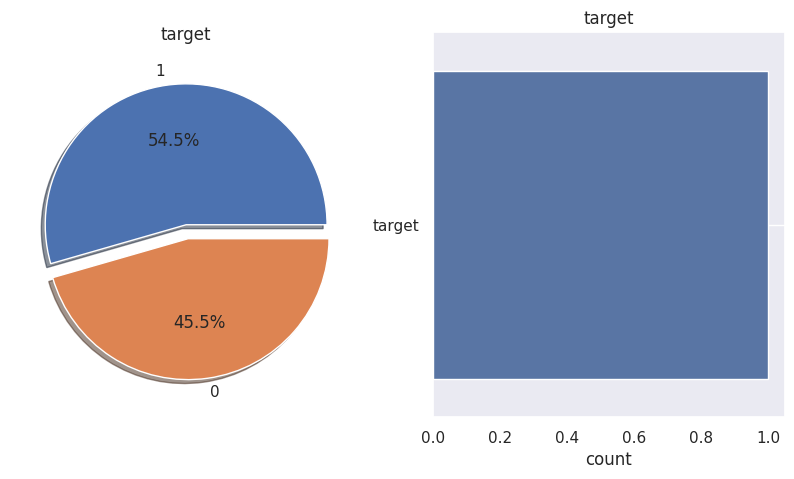

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
f,ax=plt.subplots(1,2,figsize=(10,5))
df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',ax=ax[1])
ax[1].set_title('target')
N,P=df['target'].value_counts()
print("Negative(0): ",N)
print("Positive(1): ",P)
plt.grid()
plt.show()

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>,
        <Axes: xlabel='trestbps', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='fbs', ylabel='age'>,
        <Axes: xlabel='restecg', ylabel='age'>,
        <Axes: xlabel='thalach', ylabel='age'>,
        <Axes: xlabel='exang', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='slope', ylabel='age'>,
        <Axes: xlabel='ca', ylabel='age'>,
        <Axes: xlabel='thal', ylabel='age'>,
        <Axes: xlabel='target', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='cp', ylabel='sex'>,
        <Axes: xlabel='trestbps', ylabel='sex'>,
        <Axes: xlabel='chol', ylabel='sex'>,
        <Axes: xlabel='fbs', ylabel='sex'>,
        <Axes: xlabel='restecg', ylabel='sex'>,
        <Axes: xlabel='thalach', ylabel='s

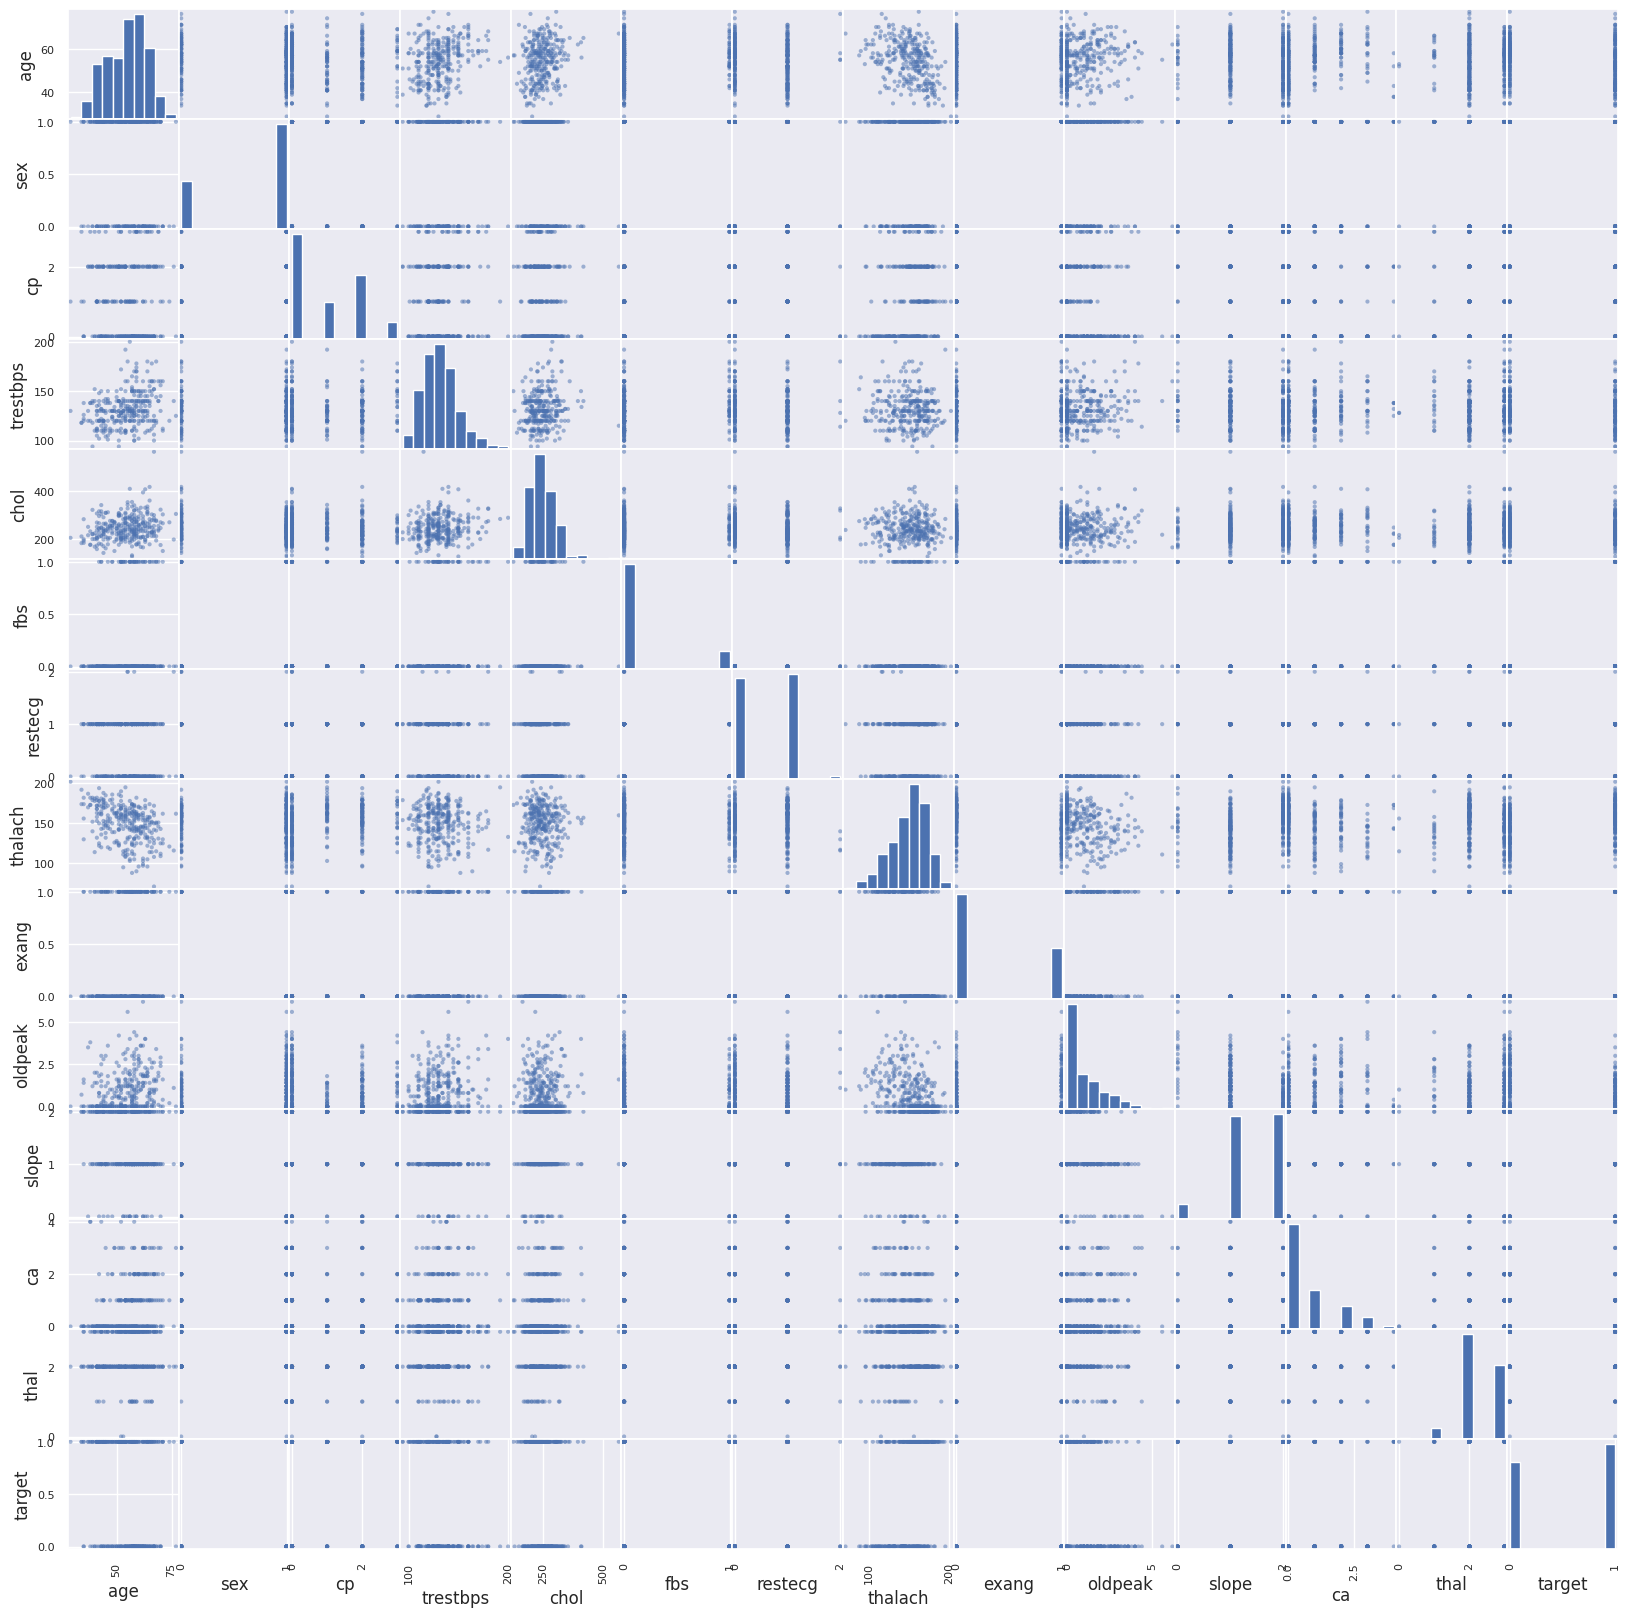

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20))

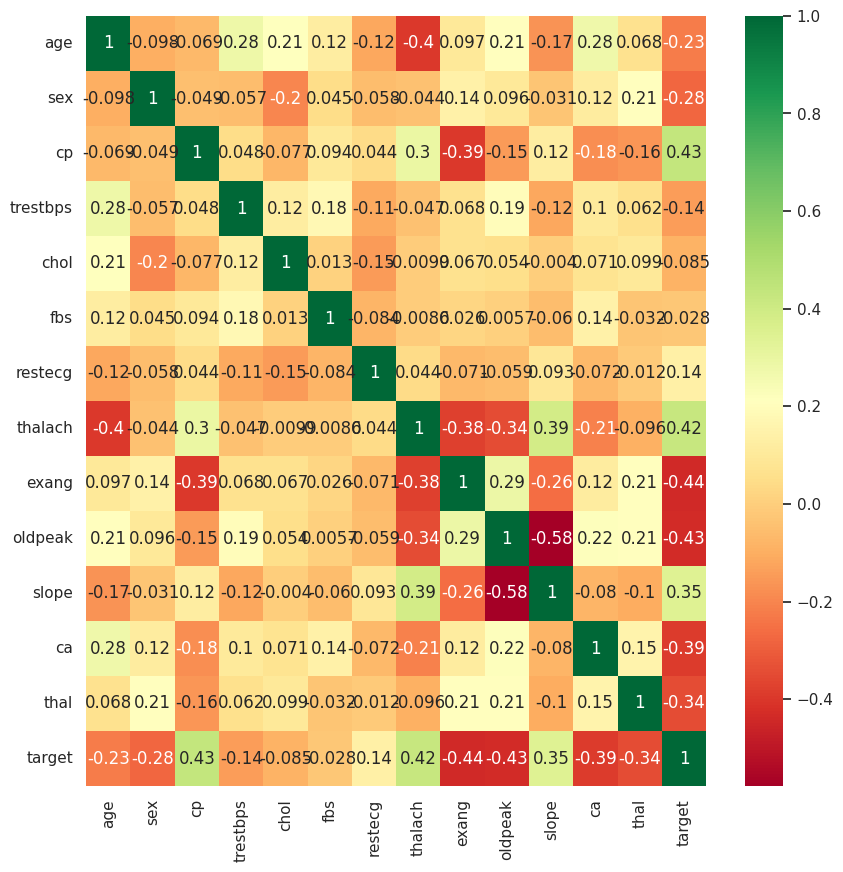

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
outcome='target'
y=df[outcome]
x=df.drop(outcome,axis=1)
x.head()

from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
normalizer.fit(x)
x_normalized=normalizer.transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape

((242, 13), (242,))

In [ ]:
x_test.shape,y_test.shape
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
knn.predict(x_test)
dt_pred=dt.predict(x_test)
print("train accuracy of score",dt.score(x_train,y_train)*100)
print("test accuracy of score",dt.score(x_test,y_test)*100)
print("accuracy of score decision tree", accuracy_score(y_test,dt_pred)*100)

train accuracy of score 100.0
test accuracy of score 73.77049180327869
accuracy of score decision tree 73.77049180327869


In [ ]:
knn_pred=knn.predict(x_test)
print("train accuracy of score",knn.score(x_train,y_train)*100)
print("test accuracy of score",knn.score(x_test,y_test)*100)
print("accuracy of score knn", accuracy_score(y_test,knn_pred)*100)

train accuracy of score 73.55371900826447
test accuracy of score 72.1311475409836
accuracy of score knn 72.1311475409836
